$\rule{800pt}{20pt}$

# Instructions
<br>
<font size="+1">
    <ul>
        <li><b>Recommended Steps</b></li>
        <br>
        <ol>
            <li>Read the prompt and summarize the task in your own words, using as few words as possible for ease of comprehension.</li>
            <br>
            <li>Pretend to be the computer program that you are trying to create. Examine the smaple inputs and manually produce the appropriate results. Afterward, verify the correctness of your logic by comparing with the given sample outputs.</li>
            <br>
            <li>On a scrap piece of paper, write step-by-step instructions so that someone else can pretend to be the computer program and produce the appropriate results for any possible inputs. These instructions should target a human audience who does not know the problem description and only has your instructions as a guide. These instructions should serve as the roadmap for your code.</li>
            <br>
            <li>On another scrap piece of paper, write fragments of Python code to implement each step in your roadmap, focusing especially on the trickiest parts of the logic.</li>
            <br>
            <li>With your roadmap and code fragments from the previous steps, type Python code into a new Jupyter notebook cel to solve the given problem. You should type incrementally and run the code whenever you add a small chunk. This allows you to correct errors as they occur. It may also be helpful to print intermediate results to verify that the code is carrying out the logic as desired.</li>
            <br>
            <li>Run your code with some sample inputs and verify that the outputs are exactly the same as the sample outputs.</li>
            <br>
            <li>Once all of your problems are finished, it is useful to click <i>Kernel</i> $\rightarrow$ <i>Restart & Run All</i> to verify that your outputs for all of your problems continue to be correct. This helps to ensure that someone else will be able to replicate your results when running your notebook.</li>
            <br>
            <font color="red"><li style="color:red">Submit the <i>.ipynb</i> file on TurnItIn on Blackboard by the deadline. Be sure to refresh the page and double check your submission actually went through. <b>Note that you only need to submit your solutions, not all of the other recommended steps.</b> The recommended steps are meant to serve as a guide for your thinking process.</li></font>
            <br>
            <ul style="color:red">
            <font color="red"><li>Do your best to make sure that I will be able to run it.</li>
        <br>
        <li>For example, read in the CSV files from the current directory. I.e., do not write the full path of the file in your code. That will allow me to run your notebook in any directory on my own PC.</li>
        <br>
        <li>Please use Text/Markdown cells to help me understand what you are doing. (I know it may be obvious, but I want to see that you know how to use Text/Markdown.)</li>
        <br>
        <li><b>Some of the questions may be vague, you can either ask me for clarification, or clearly explain your interpretation to the question and your solution to your interpretation</b>. Remember, an important part of being a data scientist is communication and soft skills, so take this as an opportunity to exercise those skills.</li></font>
        <br>
            </ul>
        </ol>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li><b>Grading</b></li>
        <br>
        <li>There are four possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for $100%$ mastery of the material, as the little details matter in programming.</li>
        <br>
        <ul>
            <li>Grade of $5$ out of $5$ - perfect submission with no significant errors</li>
            <br>
            <li>Grade of $4$ out of $5$ - near perfect submission with one or more significant errors</li>
            <br>
            <li>Grade of $2$ out of $5$ - apparent effort but far from perfect</li>
            <br>
            <li>Grade of $0$ out of $5$ - no submission or no apparent effort</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

# Before You Begin
<br>
<font size="+1">
    <ul>
        <li>Please read: <b>01_Demand_Prediction_for_Algorithmic_and_Dynamic_Pricing_Using_Principal_Components_and_Perceptrons.ipynb</b></li>
        <br>
    </ul>
</font>

$\rule{800pt}{20pt}$

# Imports

In [ ]:
import os
import os.path
import time
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import cvxpy as cp

tf.keras.utils.set_random_seed(42)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
images_path = '/content/drive/My Drive/DSO_464_Spring_2024/Images'

data_path = '/content/drive/My Drive/DSO_464_Spring_2024/01_Fundamentals_of_Machine_Learning_with_TensorFlow_I_EX_Predicting_Demand_with_Sales_Data_for_Dynamic_Pricing/Data'

In [ ]:
# tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'add_any_images_using_this_code.png'))

$\rule{800pt}{20pt}$

# Cleaning Walmart Sales Data
<br>
<font size="+1">
  <ul>
    <li><b>RUN THE FOLLOWING CODE TO GENERATE THE DATA YOU WILL NEED FOR THE REST OF THE PROBLEMS.</b></li>
    <br>
    <br>
    <li>We will use sales data from Walmart to estimate future demand of departments within stores (think of the stores' aggregate department sales as a proxy for all products' demand in that department, at that store).</li>
    <br>
    <ul>
      <font color="blue"><li>We will not implement the the optimization algorithms that use this forecast to compute the prices that maximize revenue, as this is outside the scope of the class, and involves a different set of tools (e.g. prescriptive analytics).</li></font>
      <br>
      <font color="red"><li>In the process, we will introduce some of the core concepts of deep learning including:</li>
      <br>
      <ul>
        <li>linear <b>algorithmic feature extraction</b>, i.e. representation learning via principal components analysis (PCA),</li>
        <br>
        <li>the perceptron algorithm, which is a single layer <b>fully connected neural network</b> with a linear activation function, i.e. a linear regression</li>
        <br>
        <li>a little bit of <b>Keras</b> and <b>TensorFlow</b> (more in HW 1),</li>
        <br>
        <li>and what the <i><b>learning</b></i> means in <b>deep learning</b> with gradient based optimization algorithms (GD, SGD, Batch and Mini-Batch GD).</li></font>
        <br>
      </ul>
      <font color="blue"><li>Remember, our goal for this notebook is to forecast a proxy (noisy measure) for demand (a single component in a pricing engine), rather than build a full dynamic optimal pricing engine.</li></font>
      <br>
    </ul>
    <li>Our dataset comes from the Walmart sponsored <a href="https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview">Kaggle competition</a>, and the data consists of historical sales data for 45 Walmart stores located in different regions.</li>
    <br>
    <li>Each store contains many departments, and we will try to predict the sales for each department in each store.</li>
    <br>
    <ul>
      <font color="red"><li>That is, we're trying to predict sales $$\text{Sales}_{\text{store, department, time}} = Y_{i,j,t},$$ with variables $$(X_1, X_2, \dots, X_p)$$ that we believe are related to sales through some function (that we don't know) $$ Y_{i,j,t} = f^{\text{true}}(X_1, X_2, \dots, X_p),$$ and we will try to approximate that unknown function with a deep learning algorithm that depends on weights (parameters) $$ \widehat{Y}_{i,j,t} = f^{\text{approx}}_{\lambda}(X_1, X_2, \dots, X_p; \beta), $$ and we hope this approximation is very close to the true sales numbers $$ Y_{i,j,t} \approx \widehat{Y}_{i,j,t} \iff \text{error}(\beta, \lambda) = |Y_{i,j,t} - \widehat{Y}_{i,j,t}| \approx 0. $$ </li>
      <li>This, of course, begs the question about how to find $$(\beta, \lambda),$$ this is what <b><i>training</i></b> does, and how to compute aggregate error over many samples, known as a <b><i>loss function</i></b>.</font>
      <br>
    </ul>
    <li>This prediction problem is even more challenging since holiday discount (markdown) events are included in the data, and these discount events are known to impact sales (and therefore demand), but it is difficult to predict which departments are impacted and the magnitude of the impact.</li>
    <br>
  </ul>
</font>

$\square$

In [ ]:
####################################################################################################################################################
# Description of Data - features.csv
####################################################################################################################################################
# Contains data related to the store, department, and regional activity for the given dates, such as:
# the store number, the week
# the average temperature in the region
# the cost of fuel in the region
# five anonymous variables (called MarkDown 1, 2, 3, 4, 5) related to promotional markdowns that Walmart is running
  # MarkDown data is not available for all stores at all times
# the consumer price index (CPI)
# the unemployment rate
# a binary variable that indicates whether the week is a special holiday or not
  # the four holidays (Super Bowl, Labor Day, Thanksgiving, Christmas), fall within the following weeks in the data
  # not all holidays are in the data, and dates are in the form: dd-mm-yy
  # Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
  # Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
  # Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
  # Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

features_data = pd.read_csv(os.path.join(data_path, 'features.csv'))

In [ ]:
####################################################################################################################################################
# Description of Data - stores.csv
####################################################################################################################################################
# Contains anonymized information about the 45 stores
# These variables indicate the type of store and the size of the store

stores_data = pd.read_csv(os.path.join(data_path, 'stores.csv'))

In [ ]:
####################################################################################################################################################
# Description of Data - train.csv
####################################################################################################################################################
# Contains the labels for the training data
# Covers 2010-02-05 to 2012-11-01
# It includes the store number, the department number, and the date (week)
# Weekly sales for the given department in the given store
# It also includes whether the week is a special holiday or not

train_data = pd.read_csv(os.path.join(data_path, 'train.csv'))

In [ ]:
data = pd.merge(features_data, stores_data, on=["Store"], how="outer")

data = pd.merge(data, train_data, on=["Store", "Date", "IsHoliday"], how="inner")

In [ ]:
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48


In [ ]:
## Splitting the Data Into Training and Testing Sets

# When splitting the data, we will do a time-series split into a training set and a testing set,
# where the training set contains data that occurred before the data that is in the testing set.

# We must be very careful to prevent any data leakage, i.e. a lookahead bias, at this step.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

In [ ]:
# An approximate 70/30 Time Series Split

training_data = data.loc[:'2012', :].copy()

testing_data = data.loc['2012':, :].copy()

In [ ]:
# We can probably safely fill all missing values with zero.
# For the markdowns this means that there was no markdown.

training_data.fillna(0, inplace=True)
testing_data.fillna(0, inplace=True)

In [ ]:
# We will only keep rows where we have nonnegative weekly sales, as this is a data error

training_data = training_data[training_data['Weekly_Sales']>=0]

testing_data = testing_data[testing_data['Weekly_Sales']>=0]

In [ ]:
training_data['IsHoliday'] = np.where(training_data['IsHoliday'], 1, 0)
testing_data['IsHoliday'] = np.where(testing_data['IsHoliday'], 1, 0)

<ipython-input-15-0d19938c4fbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data['IsHoliday'] = np.where(testing_data['IsHoliday'], 1, 0)


In [ ]:
# Make sure we can later recognize what a dummy once belonged to

training_testing_data = [training_data, testing_data]

for df in training_testing_data:
  df['Type'] = 'Type_' + df['Type'].map(str)
  df['Store'] = 'Store_' + df['Store'].map(str)
  df['Dept'] = 'Dept_' + df['Dept'].map(str)
  df['IsHoliday'] = 'IsHoliday_' + df['IsHoliday'].map(str)

  df['Month'] = 'Month_' + df.index.month.map(str)

  df['Black_Friday'] = np.where((df.index==datetime(2010, 11, 26).date()) | (df.index==datetime(2011, 11, 25).date()), 'yes', 'no')
  df['Pre_Christmas'] = np.where((df.index==datetime(2010, 12, 23).date()) | (df.index==datetime(2010, 12, 24).date()) | (df.index==datetime(2011, 12, 23).date()) | (df.index==datetime(2011, 12, 24).date()), 'yes', 'no')
  df['Black_Friday'] = 'Black_Friday_' + df['Black_Friday'].map(str)
  df['Pre_Christmas'] = 'Pre_Christmas_' + df['Pre_Christmas'].map(str)

In [ ]:
# Create dummies for store features and for holiday indicator

for df, i in zip(training_testing_data, range(2)):
  type_dummies = pd.get_dummies(df['Type'], drop_first=True)
  store_dummies = pd.get_dummies(df['Store'], drop_first=True)
  dept_dummies = pd.get_dummies(df['Dept'], drop_first=True)
  holiday_dummies = pd.get_dummies(df['IsHoliday'], drop_first=True)

  month_dummies = pd.get_dummies(df['Month'], drop_first=True)

  Black_Friday_dummies = pd.get_dummies(df['Black_Friday'], drop_first=True)
  Pre_christmas_dummies = pd.get_dummies(df['Pre_Christmas'], drop_first=True)

  if i == 1:
    # Nov, Dec are not in the testing sample, so we must add the columns manually
    df['Month_11'] = 0
    df['Month_12'] = 0

  training_testing_data[i] = pd.concat([df,
                                        type_dummies, store_dummies, dept_dummies, holiday_dummies,
                                        month_dummies,
                                        Black_Friday_dummies, Pre_christmas_dummies],
                                        axis=1)

In [ ]:
training_data = training_testing_data[0]

testing_data = training_testing_data[1]

In [ ]:
# Normalize the numerical variables using means and stds from the TRAINING DATA
for df in training_testing_data:
  df[['Unemployment', 'Temperature', 'Fuel_Price', 'CPI', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = (df[['Unemployment', 'Temperature', 'Fuel_Price', 'CPI', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] - training_testing_data[0][['Unemployment', 'Temperature', 'Fuel_Price', 'CPI', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean())/(training_testing_data[0][['Unemployment', 'Temperature', 'Fuel_Price', 'CPI', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].std())


In [ ]:
# Let's separate our data into X and Y

X_train = training_data[training_data.columns.drop('Weekly_Sales')].select_dtypes(include=np.number)
Y_train = training_data[['Weekly_Sales']]

X_test = testing_data[testing_data.columns.drop('Weekly_Sales')].select_dtypes(include=np.number)
Y_test = testing_data[['Weekly_Sales']]

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((420285, 148), (127026, 148), (420285, 1), (127026, 1))

In [ ]:
X_test = X_test[X_train.columns]

In [ ]:
scaler = StandardScaler()

In [ ]:
# Fit the scaler to the training data and transform the training data
x_train_norm = scaler.fit_transform(X_train)

# Transform the test data with the same scaler
x_test_norm = scaler.transform(X_test)

In [ ]:
y_scaler = StandardScaler()

In [ ]:
# Fit the scaler to the training data and transform the training data
y_train_norm = y_scaler.fit_transform(Y_train)

# Transform the test data with the same scaler
y_test_norm = y_scaler.transform(Y_test)

$\rule{800pt}{20pt}$

# Question 1: Tweaking Parameters in PCA


- You do not have to watch the following videos, they are there to help clarify (however, I do think they are good).

- Change the number of principal components (i.e. codings) to: 3, 9, 15, 50 and plot the loss on the entire training set vs the number of components

  - Note, this could take roughly 5 minutes per each number of components iteration.

- Additionally, generate a single plot of the loss per epoch for each number of components (add a legend for the number of components).

- Describe what you observe and attempt to explain what you observe (just do your best here, we are **experimenting** and there is no right answer).

- Finally, pick the number of components (codings) that give you the smallest loss, and use that to generate the features that will be used to predict demand in the next question.

Please fill in the missing pieces of the code, and write your solutions below.

In [ ]:
from IPython.display import HTML

# You do not have to watch the following video (but it is interesting)
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/FgakZw6K1QQ?si=EFGQrXGqBHcRsUYX" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [ ]:
# Consider the following list of number of components - 3, 9, 15, 50
number_of_components = [3, 9, 15, 50]

In [ ]:
# Complete the following code for the extraction of the principal components
# Specifically, write code, or complete existing code in the following lines with three hashtags (###),
# once you write or fill-in the code, be sure to UN-COMMENT your code,
# everything else you can leave as is, and then run the cell.

encoders = {} # creates an empty dictionary to store the encoder layer (which we will use to generate the principal components)
history_data = {} # creates an empty dictionary to store the history of the training steps

# Loop through the different number of components
for num in number_of_components:
  print("Now starting for:", num, "of components")
  tf.keras.utils.set_random_seed(42) # to ensure consistency of the random initialization of the weights

   # We will organize the autoencoder into two subcomponents:
   # the encoder - a regular sequential model with a single Dense layer
   # the decoder - a regular sequential model with a single Dense layer

  encoder = tf.keras.Sequential([tf.keras.layers.Dense(num, input_shape=(x_train_norm.shape[1], ))])

  # The autoencoder's number of outputs must equal the number of inputs

  decoder = tf.keras.Sequential([tf.keras.layers.Dense(x_train_norm.shape[1])])

  # The autoencoder is a sequential model containing the encoder followed by the decoder
  # To perform PCA, we don't use any activation function (i.e. all neurons are linear), and the loss function is MSE
  # This is because PCA is a linear transformation

  autoencoder = tf.keras.Sequential([encoder, decoder])
  autoencoder.compile(loss="mse")

  # Note that we only use the inner hidden layer to generate the derived features
  # These are known as the "codings"

  history = autoencoder.fit(x_train_norm, x_train_norm, epochs=5, verbose=True)
  encoders[num] = encoder
  history_data[num] = history.history

Now starting for: 3 of components
Epoch 1/5
13134/13134 [==============================] - 31s 2ms/step - loss: 0.9508
Epoch 2/5
13134/13134 [==============================] - 29s 2ms/step - loss: 0.9490
Epoch 3/5
13134/13134 [==============================] - 30s 2ms/step - loss: 0.9490
Epoch 4/5
13134/13134 [==============================] - 32s 2ms/step - loss: 0.9490
Epoch 5/5
13134/13134 [==============================] - 28s 2ms/step - loss: 0.9490
Now starting for: 9 of components
Epoch 1/5
13134/13134 [==============================] - 39s 3ms/step - loss: 0.8871
Epoch 2/5
13134/13134 [==============================] - 27s 2ms/step - loss: 0.8839
Epoch 3/5
13134/13134 [==============================] - 27s 2ms/step - loss: 0.8839
Epoch 4/5
13134/13134 [==============================] - 49s 4ms/step - loss: 0.8838
Epoch 5/5
13134/13134 [==============================] - 28s 2ms/step - loss: 0.8837
Now starting for: 15 of components
Epoch 1/5
13134/13134 [========================

## Plot of PCA losses

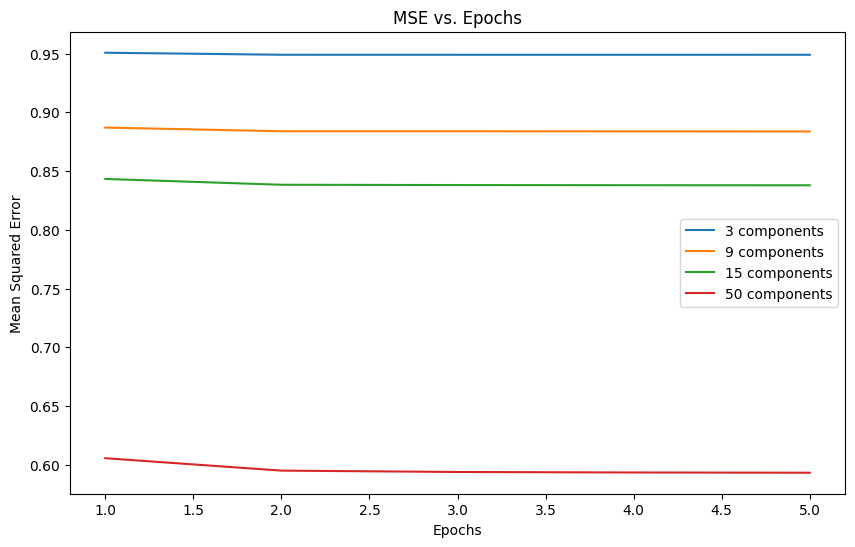

In [ ]:
# Run this code to visualize the error, how can you explain the following plot?
# Write your explanation in a cell below this code.

epochs = [i for i in range(1,6)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, history_data[3]['loss'], label='3 components')
plt.plot(epochs, history_data[9]['loss'], label='9 components')
plt.plot(epochs, history_data[15]['loss'], label='15 components')
plt.plot(epochs, history_data[50]['loss'], label='50 components')
plt.title('MSE vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Write your explanation HERE.
The plot shows how the MSE of the PCA varies as a function of the number of epochs. In this case, the MSE is being computed using the original data and its reconstruction (or projection) in a lower dimensional space which we create through the auto-econder.


One conclusion that we can draw is that the greater the number of principal components, the lower the MSE. Eventually, I expect that if the number of PC is the same as the size of the output, then the MSE should be zero (as long as the model converges).
To decide which number of componenets to use, we should ask ourselves some questions..
For example, is our goal to minimize the MSE? Then pick the model with the greatest amount of principal components.
However, if we use PCA then I believe our goal is not to minimize the MSE (or yes, minimize it but not make it converge to zero, otherwise just do not use PCA).
Rather, it will be to find a number of components, as small as possible, that still captures most of the variance of the initial data, so that our representation is good, but in lower dimensions.
Basing on this rationale, I believe my choice would be to pick the model with 15 components, as is it a model with few PC, but among the models with few PC's is the one with the lowest error.
Another observation: the more we increase the epochs, the lower the error. A good rule of thumb to decide when to stop increasing the epochs is the "elbow rule", i.e. stop when the marginal decrease in the loss is irrelevant.
In our case, we could just stop at 2 epochs, as the remaning part of the training seems to be almost unuseful (especially if the training starts being long due to efficiency constraints.).


## Selection of Number of Components

- Based on your above observations, choose the number of components that you think would be best to generate the principal components of your data.

In [ ]:
desired_num_of_components = 50  # I picked 50 as the task says pick the num of PC with lowest loss

X_train_PC_codings = encoders[desired_num_of_components].predict(x_train_norm)

X_test_PC_codings = encoders[desired_num_of_components].predict(x_test_norm)

3970/3970 [==============================] - 6s 2ms/step


$\rule{800pt}{20pt}$

# Question 2: Tweaking the Parameters and Model for a Single Layer Perceptron

- Use the best principal components (codings) from the previous problem as the features for the following linear regression (single-layer perceptron) model.


- Use the code given below to test three different optimizers (SGD, RMSProp, Adam) and plot the loss history vs the number of epochs for each optimizer choice.

- Specify which optimizer gives the lowest error when training your perceptron model with 5 epochs.

  - Feel free to make some other changes and report your results.



Please fill in the missing pieces of the code, and write your solutions below.

In [ ]:
# This describes what the model consists of

lin_reg = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_PC_codings.shape[1],)),
    tf.keras.layers.Normalization(axis=-1), # When -1 the last axis of the input is assumed to be a feature dimension and is normalized per index.
    tf.keras.layers.Dense(1, activation='linear')
  ])

In [ ]:
# Compile your model with SGD - complete the following code
# Specifically, write code, or complete existing code in the following lines with three hashtags (###),
# once you write or fill-in the code, be sure to UN-COMMENT your code,
# everything else you can leave as is, and then run the cell.

lin_reg.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)) # you specify loss, optimizer, and any metrics

In [ ]:
X_train_PC_codings.shape

(420285, 50)

In [ ]:
lin_reg.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 50)                101       
 on)                                                             
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 152 (612.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 101 (408.00 Byte)
_________________________________________________________________


In [ ]:
%%time
# This is built-in training loop
# It iterates over the training data in mini-batches (of some size, say 32 samples) for some number of epochs (an iteration over the entire training data)
# For each batch, the model will compute the gradient of the loss with regard to the weights (which uses the Backpropagation algorithm)
# It then moves the weights in the direction that will reduce the value of the loss for this batch of data


sgd_history = lin_reg.fit(X_train_PC_codings, y_train_norm, epochs=5, verbose=True, batch_size=32)

Epoch 1/5
13134/13134 [==============================] - 26s 2ms/step - loss: 0.9631
Epoch 2/5
13134/13134 [==============================] - 27s 2ms/step - loss: 0.9228
Epoch 3/5
13134/13134 [==============================] - 26s 2ms/step - loss: 0.9227
Epoch 4/5
13134/13134 [==============================] - 26s 2ms/step - loss: 0.9228
Epoch 5/5
13134/13134 [==============================] - 26s 2ms/step - loss: 0.9227
CPU times: user 2min 15s, sys: 7.41 s, total: 2min 22s
Wall time: 2min 10s


In [ ]:
# Returns the loss value & metrics values for the model

lin_reg.evaluate(lin_reg.predict(X_train_PC_codings), y_train_norm)

13134/13134 [==============================] - 24s 2ms/step - loss: 1.0768


1.0768314599990845

## Now repeat the follwing steps for <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/RMSprop">RMSProp Optimizer</a>

1. Create a model
2. Compile model
3. Fit the model to training data
4. Evaluate model on test data

Complete the code below to achieve it. (Feel free to look up what this optimizer is. See <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/RMSprop">here</a> for documentation.)

In [ ]:
# Complete the following code
# Specifically, write code, or complete existing code in the following lines with three hashtags (###),
# once you write or fill-in the code, be sure to UN-COMMENT your code,
# everything else you can leave as is, and then run the cell.

# RMSProp
lin_reg = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train_PC_codings.shape[1],)),
  tf.keras.layers.Normalization(axis=-1), # When -1 the last axis of the input is assumed to be a feature dimension and is normalized per index.
  tf.keras.layers.Dense(1, activation='linear')
])

lin_reg.compile(loss="mse",optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001))

rms_history = lin_reg.fit(X_train_PC_codings, y_train_norm, epochs=5, verbose=True, batch_size=32)

Epoch 1/5
13134/13134 [==============================] - 25s 2ms/step - loss: 0.9718
Epoch 2/5
13134/13134 [==============================] - 25s 2ms/step - loss: 0.9253
Epoch 3/5
13134/13134 [==============================] - 25s 2ms/step - loss: 0.9250
Epoch 4/5
13134/13134 [==============================] - 25s 2ms/step - loss: 0.9252
Epoch 5/5
13134/13134 [==============================] - 25s 2ms/step - loss: 0.9251


In [ ]:
lin_reg.evaluate(lin_reg.predict(X_train_PC_codings), y_train_norm)

13134/13134 [==============================] - 23s 2ms/step - loss: 1.0737


1.0737485885620117

## Now repeat the follwing steps for <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adam">Adam Optimizer</a>

1. Create a model
2. Compile model
3. Fit the model to training data
4. Evaluate model on test data

Complete the code below to achieve it. (Feel free to look up what this optimizer is. See <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adam">here</a> for documentation.)

In [ ]:
# Complete the following code
# Specifically, write code, or complete existing code in the following lines with three hashtags (###),
# once you write or fill-in the code, be sure to UN-COMMENT your code,
# everything else you can leave as is, and then run the cell.

# Adam
lin_reg = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train_PC_codings.shape[1],)),
  tf.keras.layers.Normalization(axis=-1), # When -1 the last axis of the input is assumed to be a feature dimension and is normalized per index.
  tf.keras.layers.Dense(1, activation='linear')
])

lin_reg.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
adam_history = lin_reg.fit(X_train_PC_codings, y_train_norm, epochs=5, verbose=True, batch_size=32)

Epoch 1/5
13134/13134 [==============================] - 28s 2ms/step - loss: 0.9621
Epoch 2/5
13134/13134 [==============================] - 27s 2ms/step - loss: 0.9255
Epoch 3/5
13134/13134 [==============================] - 26s 2ms/step - loss: 0.9255
Epoch 4/5
13134/13134 [==============================] - 25s 2ms/step - loss: 0.9256
Epoch 5/5
13134/13134 [==============================] - 25s 2ms/step - loss: 0.9254


In [ ]:
lin_reg.evaluate(lin_reg.predict(X_train_PC_codings), y_train_norm)

13134/13134 [==============================] - 23s 2ms/step - loss: 1.0671


1.0670915842056274

In [ ]:
# evalutating on test data
lin_reg.evaluate(lin_reg.predict(X_test_PC_codings), y_test_norm)

3970/3970 [==============================] - 6s 1ms/step - loss: 27393.0059


27393.005859375

## Plotting the history

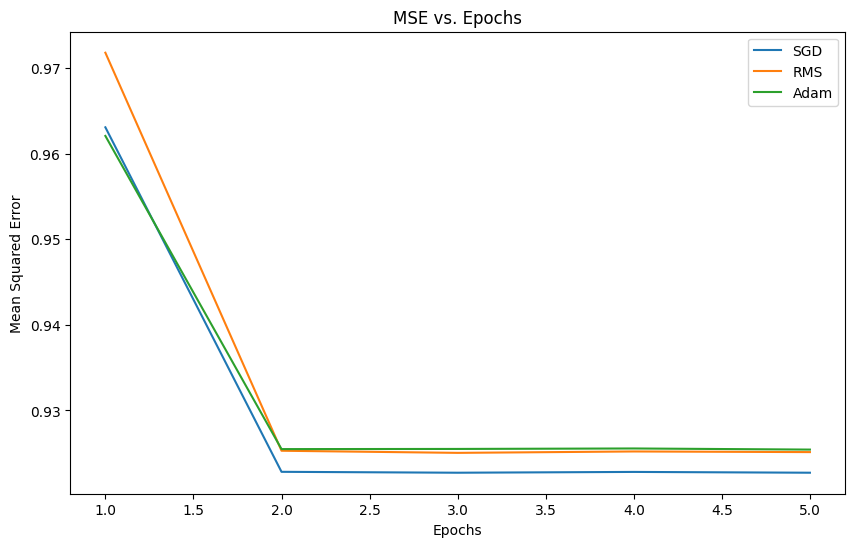

In [ ]:
# Write your own code to display history of loss.
# Hint: use and adapt the plotting code from the previous question.

epochs = [i for i in range(1,6)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, sgd_history.history["loss"], label='SGD')
plt.plot(epochs, rms_history.history["loss"], label='RMS')
plt.plot(epochs, adam_history.history["loss"], label='Adam')
plt.title('MSE vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Observation
All the three different optimizers yield to very low losses. However, from the above graph we can observe that SGD seems to perform slightly better than the other two. Another interesting fact is that after the second epoch, the losses seems to become pretty steady, which means that the model is likely to have converged and we won't gain from an increase in epochs.

If we want to do some experiments, we could try to change some hyperparameters such as the batch size or the learning rate.
We could also switch from a perceptron to a MLP to enhance the power of the model.. however the loss is already pretty low and seems that it won't get much lower than that.

$\rule{800pt}{20pt}$

$\rule{800pt}{20pt}$

# Question 3: Implementing Mini-Batch SGD in a Training Loop for a Single-Layer Perceptron

- This problem is using simpler simulated data, where we know the that pattern we are trying to learn.

- We will start by creating a simple step-by-step mini-batch SGD

## RECALL: Building a Custom Training Loop with TensorFlow
<br>
<font size="+1">
  <ul>
    <li>What is a training loop?</li>
    <br>
    <ul>
      <li>A training loop is a loop over training steps, i.e. steps that change weights in a direction that lowers the average errors.</li>
      <br>
    </ul>
    <li>A training loop:</li>
    <br>
    <ul>
      <li>iterates over the training data in mini-batches (of some size, say 32 samples) for some number of epochs (an iteration over the entire training data)</li>
      <br>
      <li>for each batch, the model will compute the gradient of the loss with regard to the weights (which uses the Backpropagation algorithm)</li>
      <br>
      <li>it then moves the weights in the direction that will reduce the value of the loss for this batch of data</li>
      <br>
    </ul>
    <font color="red"><li>In other words, a training loop:</li></font>
    <br>
    <ul>
      <font color="red"><li>samples data</li>
      <br>
      <li>generates predictions on the samples</li>
      <br>
      <li>computes the average error (loss) of the predictions and the sample targets</li>
      <br>
      <li>computes the gradient of the average error with respect to the weights</li>
      <br>
      <li>changes the weights according to a rule specified by the optimization algorithm</li>
      <br>
      <ul>
        <font color="red"><li>this rule is trying to move closer to the solution of the problem $$\min_w L(w \ ; \underbrace{\mathcal{D}}_{\text{sample}\\ \text{data}})$$</li></font>
        <br>
      </ul>
      <li>and then repeats the sequence of steps</li></font>
      <br>
  </ul>
  <li>For more on building a custom training loop, including things that can go wrong, see <a href="https://www.tensorflow.org/guide/autodiff#cases_where_gradient_returns_none">here</a>.</li>
  <br>
</font>

$\square$

In [ ]:
# Lets first create some synthetic data for a simple regression problem

# Creating a synthetic dataset
np.random.seed(0)
data_size = 1000
x_data = np.random.rand(data_size, 1).astype(np.float32)

# y = 2x + 1 + noise
y_data = 2 * x_data + 1 + 0.2 * np.random.randn(data_size, 1).astype(np.float32)

In [ ]:
# Complete the following code
# Specifically, write code, or complete existing code in the following lines with three hashtags (###),
# once you write or fill-in the code, be sure to UN-COMMENT your code,
# everything else you can leave as is, and then run the cell.

# Training
learning_rate = 0.01
epochs = 100
batch_size = 16

############################################# - to compute no of steps required in each epoch i.e, no of batches in each epoch
num_steps = len(x_data)//batch_size # Complete your code
#############################################

loss_history = []

############################################# - to initialize variables. here we are intializing weight and bias
w = tf.Variable(3.) # create a tensor variable of value 3.0 and name it as w - this is our slope / weight
b = tf.Variable(-1.) # create a tensor variable of value -1.0 and name it as b - this is our intercept / bias
#############################################
w_history = []
b_history = []

w_gradient_history = []
b_gradient_history = []

w_history.append(w.numpy())
b_history.append(b.numpy())
# Training loop
for epoch in range(epochs):
  print(epoch,end='\r')
  for i in range(0, num_steps):

    x_slice = x_data[num_steps * i: num_steps * (i + 1)]
    y_slice = y_data[num_steps * i: num_steps * (i + 1)]

    ###################################### - complete the code to fill gradient tape that is used to compute gradients
    with tf.GradientTape() as tape:
      y_pred = w * x_data + b
      # loss = tf.Variable(np.sum((y_data - y_pred)**2) / len(y_data))
      loss = tf.reduce_mean(tf.square(y_data - y_pred))
      gradients = tape.gradient(loss, [w, b])

    w_gradient_history.append(gradients[0].numpy())
    b_gradient_history.append(gradients[1].numpy())

    ##################################### - complete the code to update the weights and bias
    w.assign_sub(learning_rate*gradients[0])
    b.assign_sub(learning_rate*gradients[1])
    #####################################

    w_history.append(w.numpy())
    b_history.append(b.numpy())

# Print trained parameters
print(f"Trained parameters: w = {w.numpy()}, b = {b.numpy()}")

Trained parameters: w = 1.981007695198059, b = 1.0152126550674438


<Axes: >

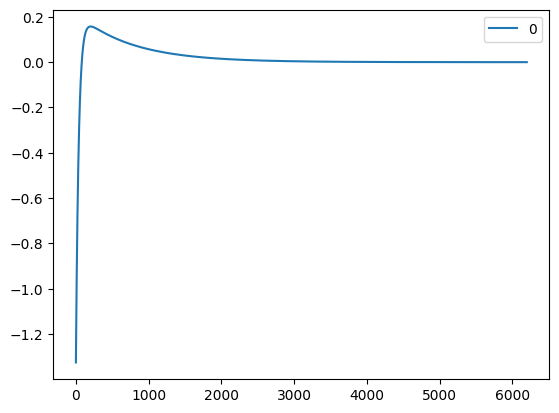

In [ ]:
pd.DataFrame(w_gradient_history).plot()

<Axes: >

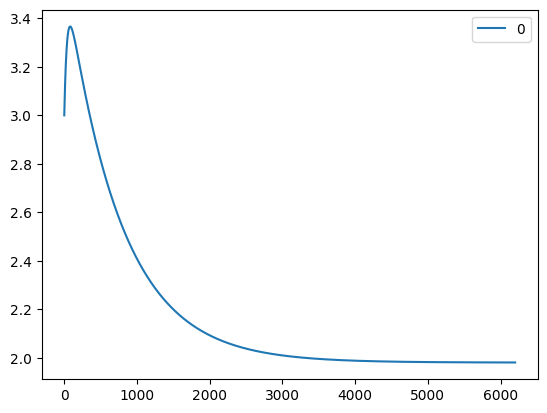

In [ ]:
pd.DataFrame(w_history).plot()

<Axes: >

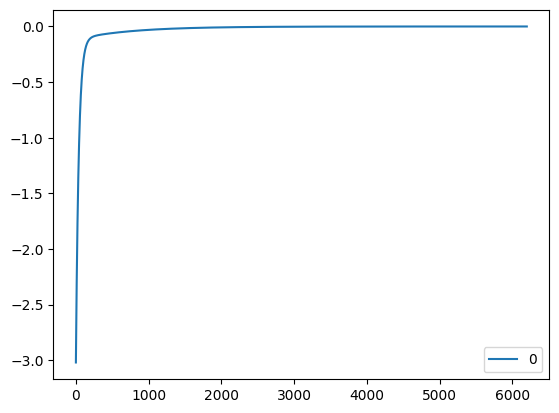

In [ ]:
pd.DataFrame(b_gradient_history).plot()

<Axes: >

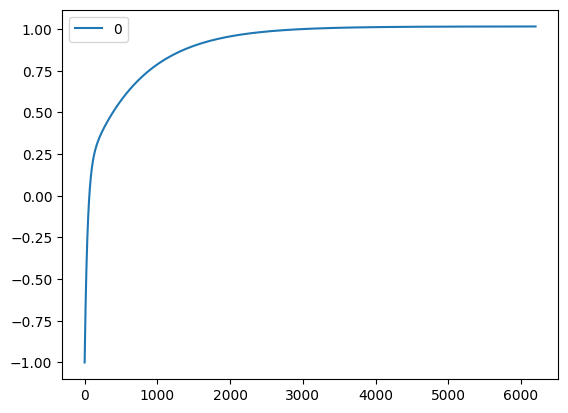

In [ ]:
pd.DataFrame(b_history).plot()

# Observation
It's cool to notice how the gradients converge to zero. As the epochs increase and the model learns, the estimated values get closer to their real values and the loss decreases. In this case, we are getting closer to a the global minimum. In other cases, when we do not know the real parameters, we could be in front of a vanishing gradient and be stuck in a local minimun... that would be a problem! SGD or batch - GD help anyway by introducing some randomness in the greedy process of vanilla GD.

$\rule{800pt}{20pt}$

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

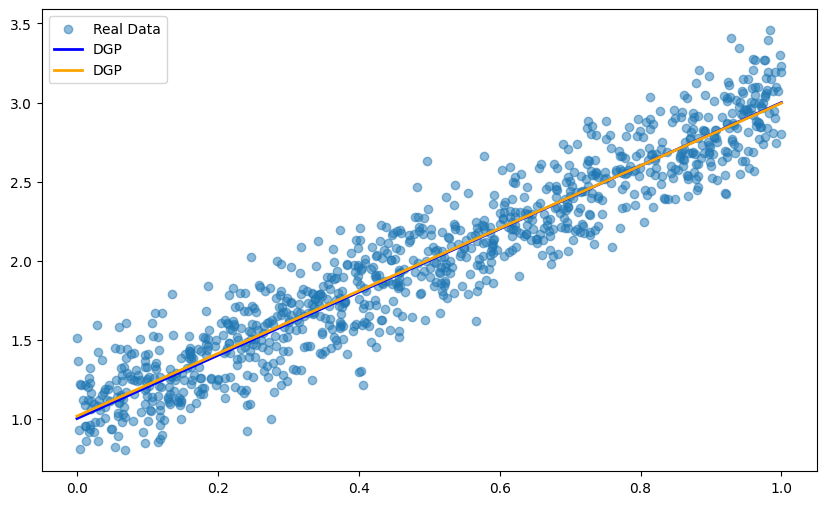

In [ ]:
plt.figure(figsize=(10, 6))

x_fine = np.linspace(0, 1, 1000)
y_fine_true = 2 * x_fine + 1
y_fine_pred = w * x_fine + b

plt.scatter(x_data, y_data, label="Real Data", alpha=0.5)
plt.plot(x_fine, y_fine_true, label="DGP", color="blue", linewidth=2)
plt.plot(x_fine, y_fine_pred, label="DGP", color="orange", linewidth=2)

plt.legend()
plt.show()

epoch:0 params:(3.0, -1.0)


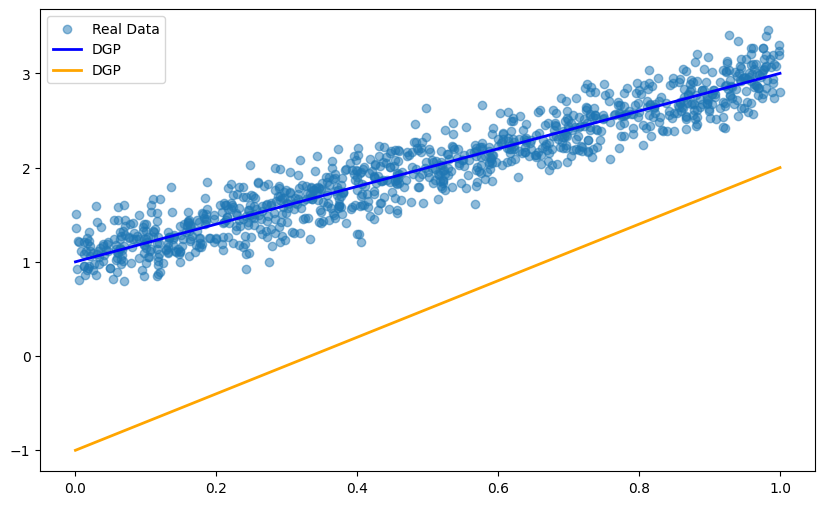

epoch:1033 params:(2.3899932, 0.7978618)


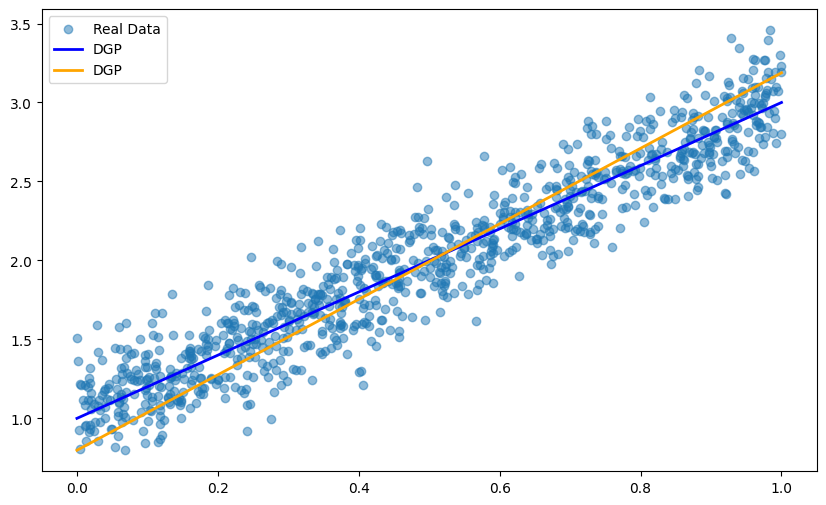

epoch:2066 params:(2.0834138, 0.96079016)


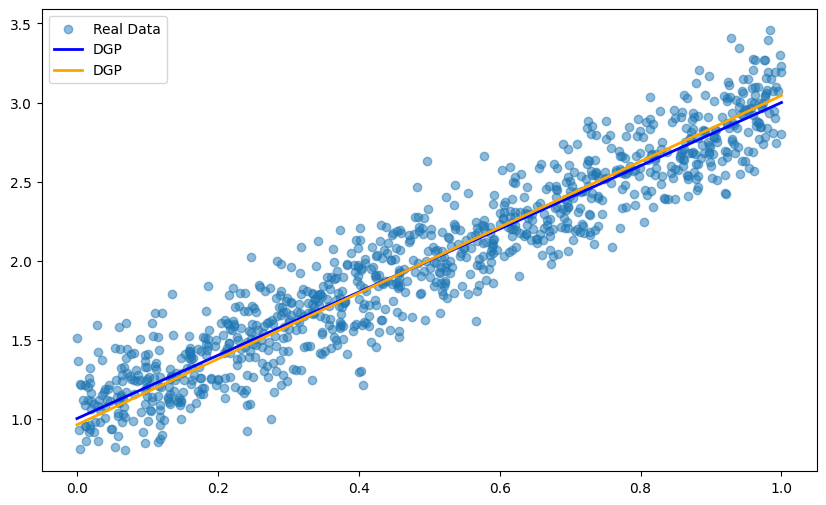

epoch:3099 params:(2.0064151, 1.0017103)


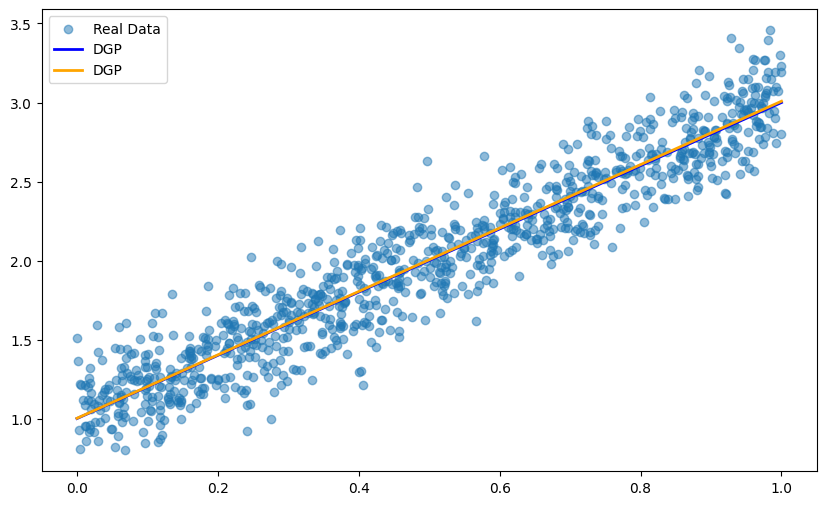

epoch:4132 params:(1.9870784, 1.0119865)


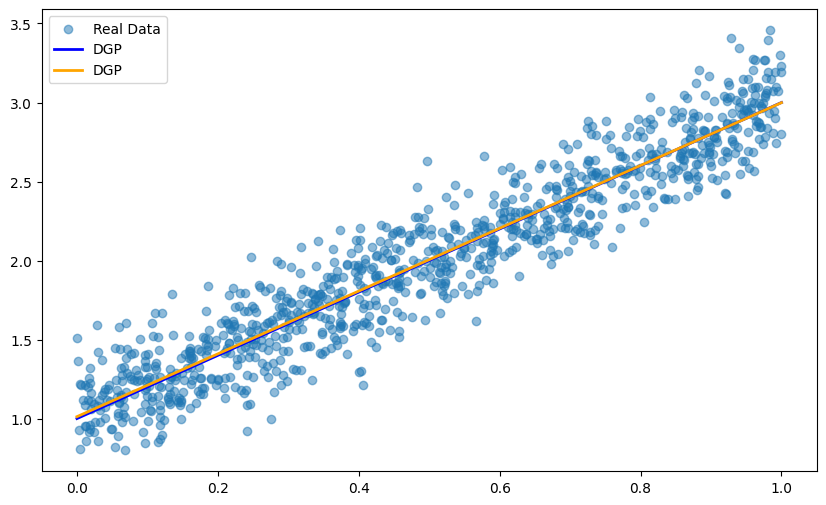

epoch:5165 params:(1.9822241, 1.014566)


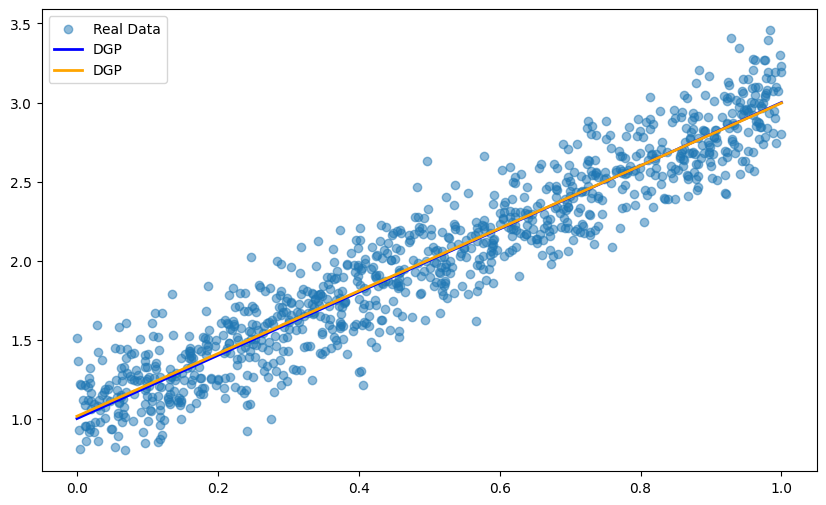

epoch:6198 params:(1.9810089, 1.015212)


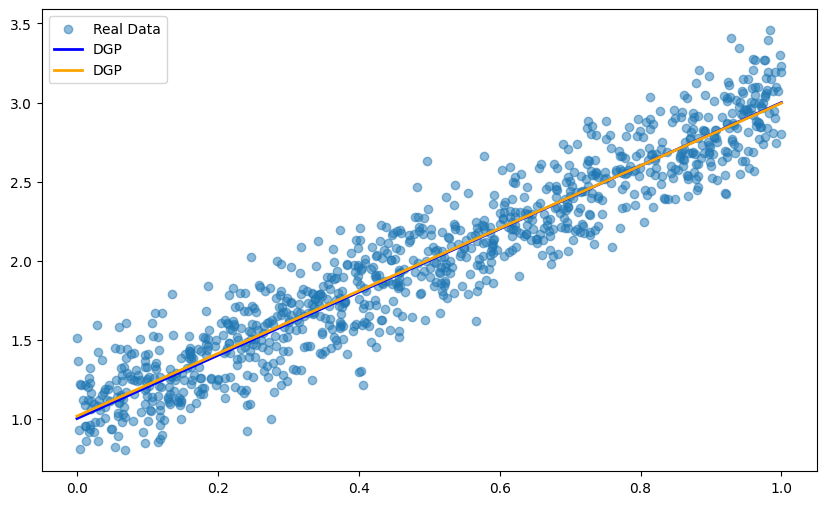

In [ ]:
for epoch in range(0, (num_steps*epochs)+1, (num_steps*epochs)//6):

  plt.figure(figsize=(10, 6))

  x_fine = np.linspace(0, 1, 1000)
  y_fine_true = 2 * x_fine + 1
  estimated_w, estimated_b =  w_history[epoch], b_history[epoch]
  print(f"epoch:{epoch} params:{estimated_w, estimated_b}")
  y_fine_pred = estimated_w * x_fine + estimated_b

  plt.scatter(x_data, y_data, label="Real Data", alpha=0.5)
  plt.plot(x_fine, y_fine_true, label="DGP", color="blue", linewidth=2)
  plt.plot(x_fine, y_fine_pred, label="DGP", color="orange", linewidth=2)

  plt.legend()
  plt.show()